### Import Libraries

In [43]:
import numpy as np
import pandas as pd

### Load Dataset

In [44]:
df = pd.read_csv('data.csv')
df.head()

,Bedrooms,Area,Price
0,2,202.0,1480000.0
1,2,156.0,1035000.0
2,3,134.0,1465000.0
3,3,94.0,850000.0
4,4,120.0,1600000.0


### Visualize Data

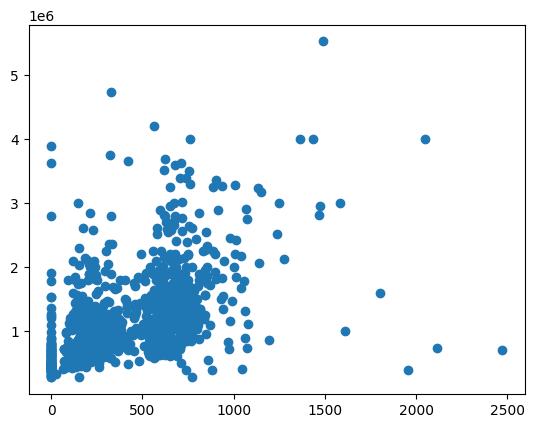

In [45]:
##Run this cell to visualize the data###
import matplotlib.pyplot as plt

plt.scatter(x=df.Area.values, y=df.Price.values)
plt.show()

### Check for Missing Values

In [46]:
df.isna().sum()

Bedrooms    0
Area        0
Price       0
dtype: int64

### Perform Minmax Scaling

In [47]:
def minmax_scaling(data, column):
    min_val = data[column].min()
    max_val = data[column].max()
    return (data[column] - min_val) / (max_val - min_val)

In [48]:
df['scaled_area'] = minmax_scaling(df, 'Area')
df['scaled_price'] = minmax_scaling(df,'Price')
df.head()

,Bedrooms,Area,Price,scaled_area,scaled_price
0,2,202.0,1480000.0,0.081748,0.228789
1,2,156.0,1035000.0,0.063132,0.143947
2,3,134.0,1465000.0,0.054229,0.225929
3,3,94.0,850000.0,0.038041,0.108675
4,4,120.0,1600000.0,0.048563,0.251668


### Divide Data into Training and Testing

In [49]:
def train_test_split (data, ratio):
    indices = np.random.permutation(data.shape[0])
    test_set_size = int(data.shape[0] * ratio)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [22]:
###Understand the above function and divide data into X_train, X_test, y_train, y_test###
df_train, df_test = train_test_split(df, 0.2)
x_train = df_train.drop(['Price','Area','scaled_price'], axis=1)
y_train = df_train['scaled_price']
x_test = df_test.drop(['Price','Area','scaled_price'], axis=1)
y_test = df_test['scaled_price']
y_test.head()


427    0.048618
348    0.210010
794    0.188751
76     0.118208
597    0.223070
Name: scaled_price, dtype: float64

### Calculate Weights Using the Normal Equation Method (Matrix Algebra)

In [26]:
###Use the np.linalg.inv function to compute the weight vector/array theta (Hint: @ operator in numpy)###
###You will be required to extract numpy arrays from the DataFrame (Hint: column_name.values)###
###Also, you need to reshape the arrays and merge them to create a multi-dimensional
###array in numpy, similar to a Pandas DataFrame (Hint: np.hstack)
###A bias vector/column is also required as a column in our stacked array (Hint: np.ones)###
#x = df[['scaled_area', 'Bedrooms']].values     
#y = df['Price'].values.reshape(x.shape[0], 1)

bias = np.ones((x_train.shape[0], 1))         
X_b = np.hstack((bias, x_train))              

theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train

print(theta[0], theta[1], theta[2])

-0.04799057550854995 0.06103820764250935 0.25067932677983484


### Calculate Predictions on Test Set

In [27]:
###Calculate predictions on X_test using theta###
theta = theta.flatten()
y_pred = theta[0] + theta[1] * x_test['scaled_area'].values + theta[2] * x_test['Bedrooms'].values
print(y_pred[:5])


[0.45514661 0.71432336 0.95472673 0.97023948 0.72047412]


### Calculate MSE (Evaluate Model)

In [28]:
###Evaluate the regression model based on Mean Squared Error###
errors = y_test.values - y_pred          
squared_errors = errors ** 2             
mse = np.mean(squared_errors)            
print(mse)

0.35304609249718594


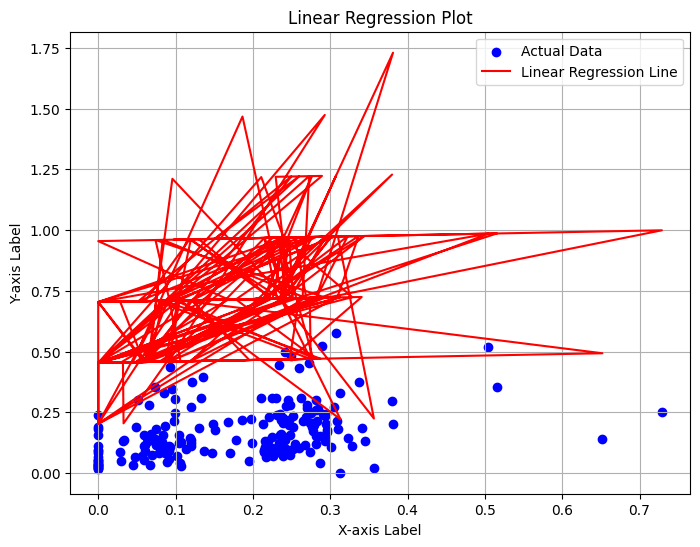

In [29]:
plt.figure(figsize=(8, 6))  # Optional: Adjust the size of the plot
plt.scatter(x_test['scaled_area'], y_test, color='blue', label='Actual Data')  # Plot the actual data points
plt.plot(x_test['scaled_area'], y_pred, color='red', label='Linear Regression Line')  # Plot the regression line
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Linear Regression Plot')
plt.legend()
plt.grid(True)  # Optional: Add a grid for better readability
plt.show()

### Inverse Transform Model's Output

In [31]:
###Transform model's output back to original range/scale###
y_pred_original = y_pred * (df['Price'].max() - df['Price'].min()) + df['Price'].min()
print(y_pred_original[:5])

[2667243.96627578 4026626.04263595 5287541.70729859 5368906.05801707
 4058886.74857369]


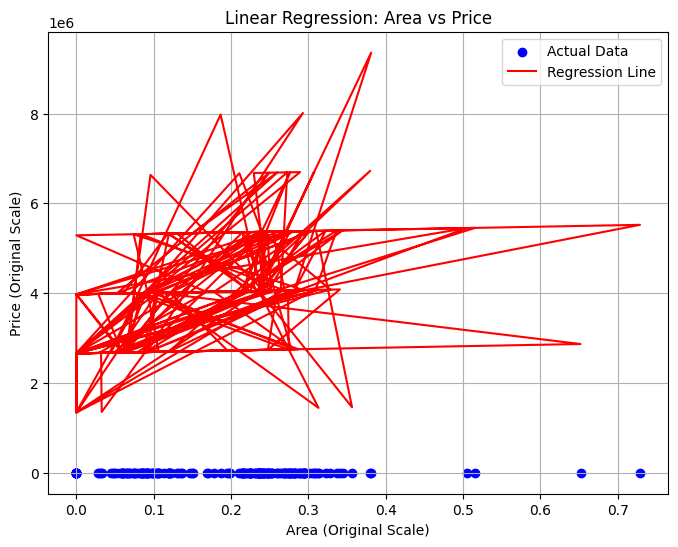

In [34]:
plt.figure(figsize=(8, 6))  # Optional: Set figure size

plt.scatter(x_test['scaled_area'], y_test.values, color='blue', label='Actual Data')
plt.plot(x_test['scaled_area'], y_pred_original, color='red', label='Regression Line')


# Labels and formatting
plt.xlabel('Area (Original Scale)')
plt.ylabel('Price (Original Scale)')
plt.title('Linear Regression: Area vs Price')
plt.legend()
plt.grid(True)
plt.show()


### Calcualte Weights Using Gradient Descent

In [36]:
###Implement Batch GD to compute the weight vector theta###
x = x_train.values  
y = y_train.values.reshape(-1, 1)  

theta0, theta1, theta2 = 0, 0, 0
alpha = 0.01
epochs = 100
n = x.shape[0]

for i in range(epochs):
    # Compute predictions
    y_pred = theta0 + theta1 * x[:, 0].reshape(-1, 1) + theta2 * x[:, 1].reshape(-1, 1)
    # Compute errors
    error = y_pred - y
    # Compute gradients
    d_theta0 = (1/n) * np.sum(error)
    d_theta1 = (1/n) * np.sum(error * x[:, 0].reshape(-1, 1))
    d_theta2 = (1/n) * np.sum(error * x[:, 1].reshape(-1, 1))
    # Update parameters
    theta0 -= alpha * d_theta0
    theta1 -= alpha * d_theta1
    theta2 -= alpha * d_theta2
# Stack into a single theta vector
theta_gd = np.vstack((theta0, theta1, theta2))

In [37]:
print(theta0, theta1, theta2)
print(x_test['scaled_area'].values[:5])
print(x_test['Bedrooms'].values[:5])


0.010884168772405134 0.05842753927763812 0.006611599445490274
[0.029138   0.16835289 0.         0.25414812 0.26912181]
[2 3 4 4 3]


### Calculate Predictions on Test Test

In [38]:
###Calculate y_pred on weights from GD###
y_pred_gd = theta_gd[0] + theta_gd[1] * x_test['scaled_area'].values + theta_gd[2] * x_test['Bedrooms'].values
print(y_pred_gd[:5])

[0.02580983 0.04055541 0.03733057 0.05217982 0.04644309]


In [39]:
###Transform model's output back to original range/scale###
y_pred_gd_original = y_pred_gd * (df['Price'].max() - df['Price'].min()) + df['Price'].min()
print(y_pred_gd_original[:5])

[415372.55494153 492713.13809134 475798.82157765 553683.13340486
 523594.01969162]


### Calculate MSE (Evaluate Model)

In [40]:
###Calculate MSE on y_pred from GD###
errors_gd = y_test.values - y_pred_gd          
squared_errors_gd = errors_gd ** 2             
mse_gd = np.mean(squared_errors_gd)            
print(mse_gd)


0.02724201306801404


### Compare the two Approaches based on MSE ###

In [42]:
###Which approach is more accurate?###
###Which approach is fast###?
print("MSE (Normal Equation):", mse)
print("MSE (Gradient Descent):", mse_gd)

if mse < mse_gd:
    print("Normal Equation is more accurate.")
else:
    print("Gradient Descent is more accurate.")


MSE (Normal Equation): 0.35304609249718594
MSE (Gradient Descent): 0.02724201306801404
Gradient Descent is more accurate.


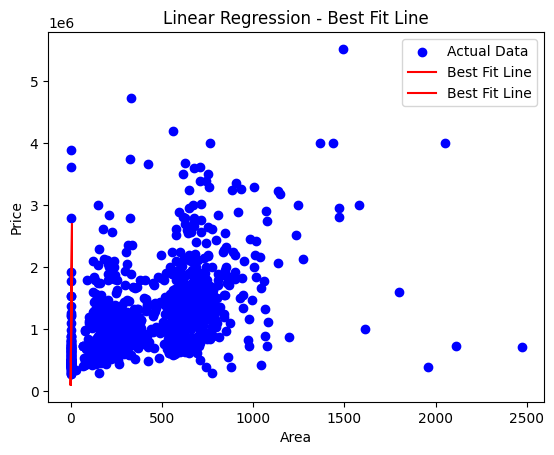

In [160]:
import matplotlib.pyplot as plt

# Example: Assume x is Area and y is Price
x = x_train  # or your full x values
y = y_train  # or your full y values

# Predicted y using the learned thetas
y_pred_line = theta0 + theta1 * x

# Plot actual data points
plt.scatter(df['Area'], df['Price'], color='blue', label='Actual Data')

# Plot regression line
plt.plot(x, y_pred_line, color='red', label='Best Fit Line')

# Add labels and title
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression - Best Fit Line')
plt.legend()
plt.show()
